<a href="https://colab.research.google.com/github/Sivasubramaniansivanayagam/Datascience-Assignment/blob/main/Sales_forecasting_GUVI_Reg_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df_store=pd.read_csv("/content/drive/MyDrive/Sales Forecasting/stores.csv")

In [3]:
print("shape is",df_store.shape)
df_store.head()

shape is (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


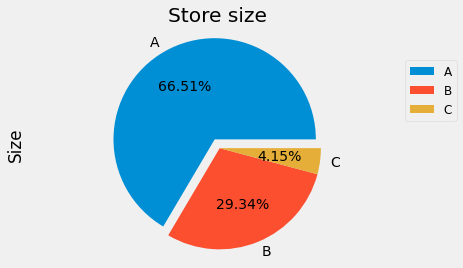

In [4]:
plt.style.use("fivethirtyeight")
gp_store=df_store.groupby("Type")["Size"].sum()
gp_store.plot.pie(autopct='%.2f%%',explode=[0.1,0,0])
plt.legend(loc=(1,0.6),fontsize=12)
plt.title("Store size")
plt.axis("equal")
plt.show()
# px.pie(gp_store,values=gp_store.values,names=gp_store.index,title="Store size")

In [5]:
# boxplot for sizes of types of stores
plt.figure(figsize=(5,3))
px.box(df_store,x='Type', y='Size',color="Type")

<Figure size 360x216 with 0 Axes>

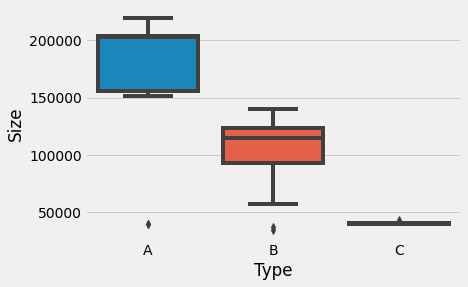

In [6]:
sns.boxplot(data=df_store,x='Type', y='Size')

<Figure size 576x432 with 0 Axes>

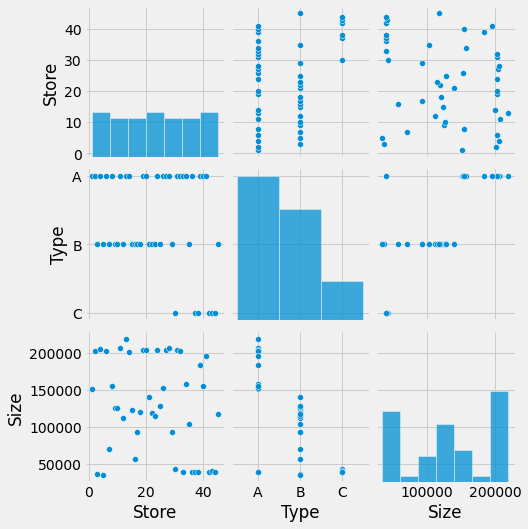

In [7]:
plt.figure(figsize=(8,6))
sns.pairplot(df_store,vars=['Store','Type','Size'])

Observation:

There are 45 stores in total.

There are a total of 3 types of stores: Type A, B and C.

By boxplot and piechart, we can say that type A store is the largest store and C is the smallest

There is no overlapped area in size among A, B, and C.

In [8]:
# Importing Train and test data
dftrain=pd.read_csv("/content/drive/MyDrive/Sales Forecasting/train.csv")
dftest=pd.read_csv("/content/drive/MyDrive/Sales Forecasting/test.csv")

In [9]:
print(f"shape of train data {dftrain.shape}")
dftrain.head()

shape of train data (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
print(f"shape of test data {dftest.shape}")
dftest.head()

shape of test data (115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
dftrain.info() , dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


(None, None)

In [12]:
# converting to date time object
dftrain["Date"]=pd.to_datetime(dftrain["Date"])
dftest["Date"]=pd.to_datetime(dftest["Date"])

In [13]:
dftrain["Week"]=dftrain["Date"].dt.isocalendar().week
dftest["Week"]=dftest["Date"].dt.isocalendar().week

In [14]:
dftrain["Month"]=dftrain["Date"].dt.month
dftest["Month"]=dftest["Date"].dt.month

dftrain["Year"]=dftrain["Date"].dt.year
dftest["Year"]=dftest["Date"].dt.year

dftrain["Day"]=dftrain["Date"].dt.day
dftest["Day"]=dftest["Date"].dt.day

dftrain["Dayofweek"]=dftrain["Date"].dt.dayofweek
dftest["Dayofweek"]=dftest["Date"].dt.dayofweek

In [15]:
dftrain.head(),dftest.head()

(   Store  Dept       Date  Weekly_Sales  IsHoliday  Week  Month  Year  Day  \
 0      1     1 2010-02-05      24924.50      False     5      2  2010    5   
 1      1     1 2010-02-12      46039.49       True     6      2  2010   12   
 2      1     1 2010-02-19      41595.55      False     7      2  2010   19   
 3      1     1 2010-02-26      19403.54      False     8      2  2010   26   
 4      1     1 2010-03-05      21827.90      False     9      3  2010    5   
 
    Dayofweek  
 0          4  
 1          4  
 2          4  
 3          4  
 4          4  ,
    Store  Dept       Date  IsHoliday  Week  Month  Year  Day  Dayofweek
 0      1     1 2012-11-02      False    44     11  2012    2          4
 1      1     1 2012-11-09      False    45     11  2012    9          4
 2      1     1 2012-11-16      False    46     11  2012   16          4
 3      1     1 2012-11-23       True    47     11  2012   23          4
 4      1     1 2012-11-30      False    48     11  2012   30 

In [16]:
dftrain["IsHoliday"].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

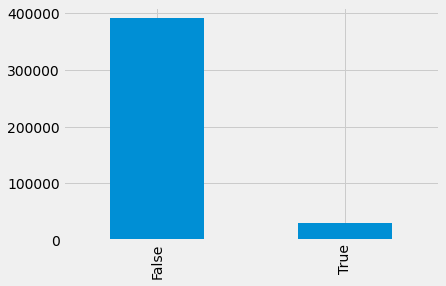

In [17]:
dftrain["IsHoliday"].value_counts().plot.bar()

In [18]:
dftrain.groupby("IsHoliday")["Weekly_Sales"].sum()

IsHoliday
False    6.231919e+09
True     5.052996e+08
Name: Weekly_Sales, dtype: float64

In [19]:
dftrain.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Week                52
Month               12
Year                 3
Day                 31
Dayofweek            1
dtype: int64

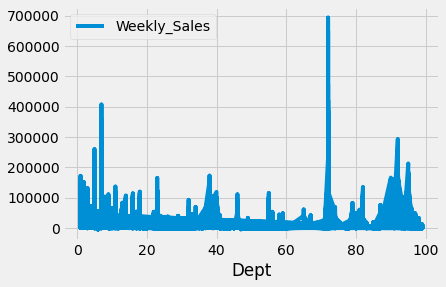

In [20]:
dftrain.plot(kind='line', x='Dept', y='Weekly_Sales', alpha=1,fig=(4,4))

Observation:

Sales in holiday is a good than normal days as the overall sales amount is near.

From this plot, we notice Deptartment with the highest sales lies between Dept 60 and 80

In [21]:
# loading features csv
df_feat=pd.read_csv("/content/drive/MyDrive/Sales Forecasting/features.csv")

In [22]:
print(f"shape of features data {df_feat.shape}")
df_feat.head()

shape of features data (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
# converting to date time object
df_feat["Date"]=pd.to_datetime(df_feat["Date"])

Merge Features data with train and test data

In [24]:
train_with_feat = pd.merge_asof(dftrain,df_feat, on='Store',by='Date')
test_with_feat = pd.merge_asof(dftest, df_feat, on='Store',by='Date')

In [25]:
train_with_feat.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Month,Year,Day,Dayofweek,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,5,2,2010,5,4,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,6,2,2010,12,4,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,7,2,2010,19,4,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,8,2,2010,26,4,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,9,3,2010,5,4,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [26]:
#merge all the features
train_with_feat_new = pd.merge(train_with_feat,df_store)
test_with_feat_new = pd.merge(test_with_feat,df_store)

In [27]:
train_with_feat_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Week,Month,Year,Day,Dayofweek,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,5,2,2010,5,4,...,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,6,2,2010,12,4,...,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,7,2,2010,19,4,...,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,8,2,2010,26,4,...,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,9,3,2010,5,4,...,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [28]:
train_with_feat_new.shape

(421570, 22)

In [29]:
#drop the dublicate of IsHoliday column
train_with_feat = train_with_feat_new.drop(columns=['IsHoliday_x'])
test_with_feat = test_with_feat_new.drop(columns=['IsHoliday_x'])

#let's rename the IsHoliday_y column to IsHoliday
train_with_feat = train_with_feat.rename(columns={"IsHoliday_y": "IsHoliday"})
test_with_feat= test_with_feat.rename(columns={"IsHoliday_y": "IsHoliday"})

In [30]:
train_with_feat.head()

,Store,Dept,Date,Weekly_Sales,Week,Month,Year,Day,Dayofweek,Temperature,...,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,5,2,2010,5,4,42.31,...,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,6,2,2010,12,4,38.51,...,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,7,2,2010,19,4,39.93,...,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,8,2,2010,26,4,46.63,...,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,9,3,2010,5,4,46.50,...,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [31]:
train_with_feat["IsHoliday"].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [34]:
# changing IsHoliday column with Flase to be 0 and True to be 1

train_with_feat["IsHoliday"]=train_with_feat["IsHoliday"].map({False:0,True:1})
test_with_feat["IsHoliday"]=test_with_feat["IsHoliday"].map({False:0,True:1})


In [36]:
train_with_feat["IsHoliday"].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

In [37]:
train_with_feat["Type"].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [38]:
# Ranking Type column with A to be 1 , B to be 2 and C to be 3

train_with_feat["Type"]=train_with_feat["Type"].map({"A":1,"B":2,"C":3})
test_with_feat["Type"]=test_with_feat["Type"].map({"A":1,"B":2,"C":3})

In [39]:
train_with_feat["Type"].value_counts()

1    215478
2    163495
3     42597
Name: Type, dtype: int64

In [40]:
train_with_feat.describe()

,Store,Dept,Weekly_Sales,Week,Month,Year,Day,Dayofweek,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,25.826762,6.449510,2010.968591,15.673131,4.0,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,0.070358,1.589912,136727.915739
std,12.785297,30.492054,22711.183519,14.151887,3.243217,0.796876,8.753549,0.0,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,0.255750,0.666337,60980.583328
min,1.000000,1.000000,-4988.940000,1.000000,1.000000,2010.000000,1.000000,4.0,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,0.000000,1.000000,34875.000000
25%,11.000000,18.000000,2079.650000,14.000000,4.000000,2010.000000,8.000000,4.0,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,0.000000,1.000000,93638.000000
50%,22.000000,37.000000,7612.030000,26.000000,6.000000,2011.000000,16.000000,4.0,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,0.000000,1.000000,140167.000000
75%,33.000000,74.000000,20205.852500,38.000000,9.000000,2012.000000,23.000000,4.0,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,0.000000,2.000000,202505.000000
max,45.000000,99.000000,693099.360000,52.000000,12.000000,2012.000000,31.000000,4.0,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,1.000000,3.000000,219622.000000


In [160]:
gp1=train_with_feat.groupby("Year")["Weekly_Sales"].sum()
gp1

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

In [161]:
px.line(gp1,x=gp1.index,y=gp1.values,title="Weekly_sales by year")

Train and test dataset Correlation

In [42]:
train_with_feat.shape

(421570, 21)

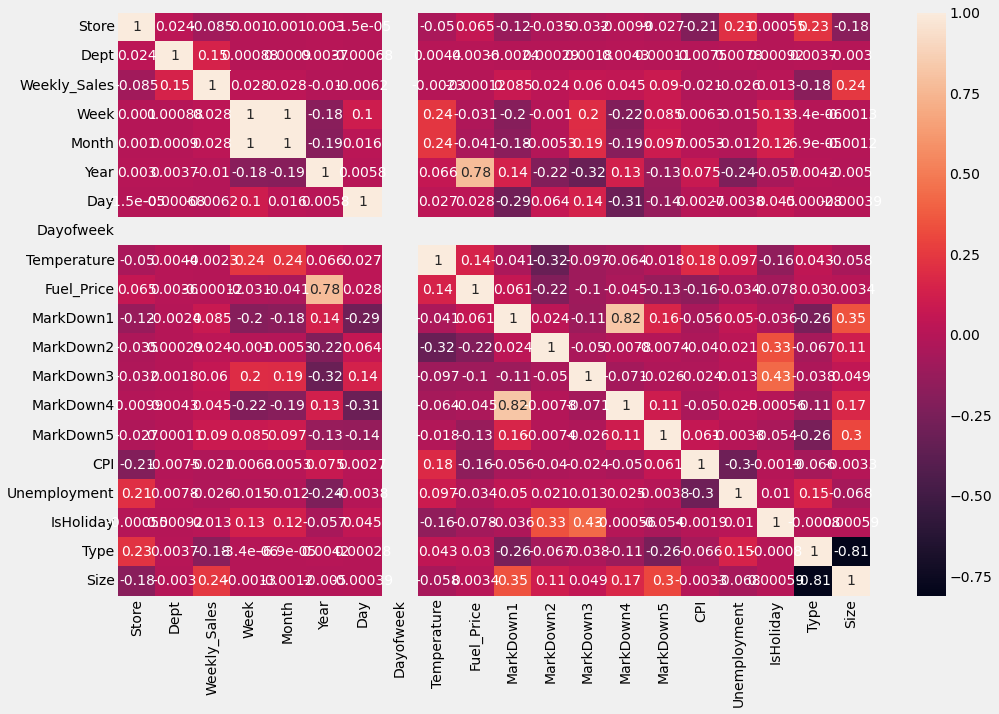

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(train_with_feat.corr(),annot=True)

In [45]:
test_with_feat.shape

(115064, 20)

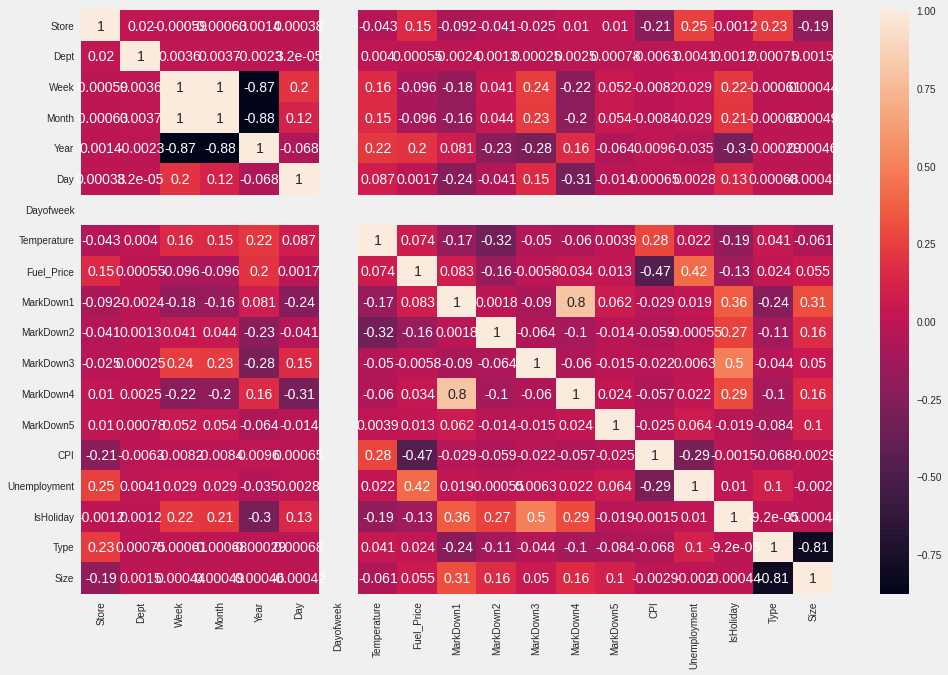

In [49]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 10))
sns.heatmap(test_with_feat.corr(),annot=True)

Filling Missing data

In [55]:
train_with_feat.isna().sum(),"********",test_with_feat.isna().sum()

(Store                0
 Dept                 0
 Date                 0
 Weekly_Sales         0
 Week                 0
 Month                0
 Year                 0
 Day                  0
 Dayofweek            0
 Temperature          0
 Fuel_Price           0
 MarkDown1       270889
 MarkDown2       310322
 MarkDown3       284479
 MarkDown4       286603
 MarkDown5       270138
 CPI                  0
 Unemployment         0
 IsHoliday            0
 Type                 0
 Size                 0
 dtype: int64, '********', Store               0
 Dept                0
 Date                0
 Week                0
 Month               0
 Year                0
 Day                 0
 Dayofweek           0
 Temperature         0
 Fuel_Price          0
 MarkDown1         149
 MarkDown2       28627
 MarkDown3        9829
 MarkDown4       12888
 MarkDown5           0
 CPI             38162
 Unemployment    38162
 IsHoliday           0
 Type                0
 Size                0
 dtype: in

In [56]:
# there was no markdown so filling it with zero

train_with_feat["MarkDown1"]=train_with_feat["MarkDown1"].fillna(0)
train_with_feat["MarkDown2"]=train_with_feat["MarkDown2"].fillna(0)
train_with_feat["MarkDown3"]=train_with_feat["MarkDown3"].fillna(0)
train_with_feat["MarkDown4"]=train_with_feat["MarkDown4"].fillna(0)
train_with_feat["MarkDown5"]=train_with_feat["MarkDown5"].fillna(0)



In [59]:
# for test
test_with_feat["MarkDown1"]=test_with_feat["MarkDown1"].fillna(0)
test_with_feat["MarkDown2"]=test_with_feat["MarkDown2"].fillna(0)
test_with_feat["MarkDown3"]=test_with_feat["MarkDown3"].fillna(0)
test_with_feat["MarkDown4"]=test_with_feat["MarkDown4"].fillna(0)
test_with_feat["MarkDown5"]=test_with_feat["MarkDown5"].fillna(0)

# filling CPI and Unemployment with mean 

test_with_feat["CPI"]=test_with_feat["CPI"].fillna(test_with_feat["CPI"].mean())
test_with_feat["Unemployment"]=test_with_feat["Unemployment"].fillna(test_with_feat["Unemployment"].mean())

In [60]:
test_with_feat.describe()

,Store,Dept,Week,Month,Year,Day,Dayofweek,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.0,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,23.050963,5.729855,2012.767182,15.583536,4.0,53.941804,3.581546,7679.259430,2805.049619,2197.811964,2980.298267,3922.681189,176.961347,6.868733,0.077592,1.592731,136497.688921
std,12.809930,30.656410,15.750407,3.590331,0.422629,8.844900,0.0,18.724153,0.239442,10695.406505,7392.556347,13183.888087,7212.030921,19445.150745,33.714479,1.294483,0.267529,0.668876,61106.926438
min,1.000000,1.000000,1.000000,1.000000,2012.000000,1.000000,4.0,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.000000,-185.170000,131.236226,3.684000,0.000000,1.000000,34875.000000
25%,11.000000,18.000000,10.000000,3.000000,2013.000000,8.000000,4.0,39.820000,3.431000,1963.550000,0.000000,7.770000,70.370000,1309.300000,138.900429,6.228000,0.000000,1.000000,93638.000000
50%,22.000000,37.000000,20.000000,5.000000,2013.000000,15.000000,4.0,54.470000,3.606000,4828.720000,316.880000,60.000000,600.580000,2390.430000,176.961347,6.868733,0.000000,1.000000,140167.000000
75%,33.000000,74.000000,30.000000,7.000000,2013.000000,23.000000,4.0,67.350000,3.766000,9427.410000,1575.850000,244.200000,2627.850000,4227.270000,201.212230,7.293000,0.000000,2.000000,202505.000000
max,45.000000,99.000000,52.000000,12.000000,2013.000000,31.000000,4.0,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,1.000000,3.000000,219622.000000


In [62]:
# checking once again if an missing values
train_with_feat.isna().sum(),"********",test_with_feat.isna().sum()

(Store           0
 Dept            0
 Date            0
 Weekly_Sales    0
 Week            0
 Month           0
 Year            0
 Day             0
 Dayofweek       0
 Temperature     0
 Fuel_Price      0
 MarkDown1       0
 MarkDown2       0
 MarkDown3       0
 MarkDown4       0
 MarkDown5       0
 CPI             0
 Unemployment    0
 IsHoliday       0
 Type            0
 Size            0
 dtype: int64, '********', Store           0
 Dept            0
 Date            0
 Week            0
 Month           0
 Year            0
 Day             0
 Dayofweek       0
 Temperature     0
 Fuel_Price      0
 MarkDown1       0
 MarkDown2       0
 MarkDown3       0
 MarkDown4       0
 MarkDown5       0
 CPI             0
 Unemployment    0
 IsHoliday       0
 Type            0
 Size            0
 dtype: int64)

Define training and testing set

In [65]:
train_with_feat.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Week', 'Month', 'Year', 'Day',
       'Dayofweek', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [69]:
# X and y for train
X=train_with_feat.drop(columns=["Date","Weekly_Sales"])
y=train_with_feat["Weekly_Sales"]


In [75]:
X=np.array(X)
y=np.array(y)

In [70]:
# for test
X_test=test_with_feat.drop(columns=["Date"])

In [79]:
X_test_data=np.array(X_test)

In [80]:
X.shape,X_test.shape

((421570, 19), (115064, 19))

In [73]:
y.shape

(421570,)

Machine Learning Models

In [78]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

TRAIN AN LINEAR REGRESSOR MODEL

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [83]:
linear_regmodel=LinearRegression()
linear_regmodel.fit(X_train,y_train)

LinearRegression()

In [88]:
accuracy_LinearRegression = linear_regmodel.score(X_test, y_test)
accuracy_LinearRegression

0.08831467380915592

TRAIN AN DECISIONTREE REGRESSOR MODEL

In [89]:
from sklearn.tree import DecisionTreeRegressor
d_model=DecisionTreeRegressor()
d_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [90]:
accuracy_DecisionTree = d_model.score(X_test, y_test)
accuracy_DecisionTree

0.9571252592134591

TRAIN AN RANDOMFOREST REGRESSOR MODEL

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf_model=RandomForestRegressor(max_depth=5,n_estimators=100)

In [98]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [99]:
accuracy_RandomForest= rf_model.score(X_test, y_test)
accuracy_RandomForest

0.6204874429675481

TRAIN AN XG-BOOST REGRESSOR MODEL

In [100]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [101]:
from xgboost import XGBRegressor

In [102]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train,y_train)

[16:48:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [103]:
accuracy_XGBoost = xgb_model.score(X_test, y_test)
accuracy_XGBoost

0.7456490477763406

Tuning Hyperparameter

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [107]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [108]:
# Fit Extreme Gradient boosting Regressor
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBRegressor(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train,y_train)
best_model(xgb_grid)

[16:53:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored

In [128]:
# Fit Extreme Gradient Boost Regressor
XGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=5,
                    min_child_weight=5, missing=None, n_estimators=100,n_jobs=1, random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(X_train,y_train)

# base_score=0.5, booster='gbtree', colsample_bylevel=1,
#              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
#              importance_type='gain', interaction_constraints='',
#              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
#              min_child_weight=1, missing=nan, monotone_constraints='()',
#              n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
#              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
#              tree_method='exact', validate_parameters=1, verbosity=None)

XGBRegressor(gamma=0.01, max_depth=5, min_child_weight=5, silent=True)

In [129]:
XGB.score(X_test,y_test)

0.8752321365587605

COMPARE MODELS AND CALCULATE REGRESSION KPIs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of Weekly_Sales'),
 Text(0.5, 0, 'Predicted Weekly_Sales'),
 Text(0.5, 1.0, 'Linear Regression Model')]

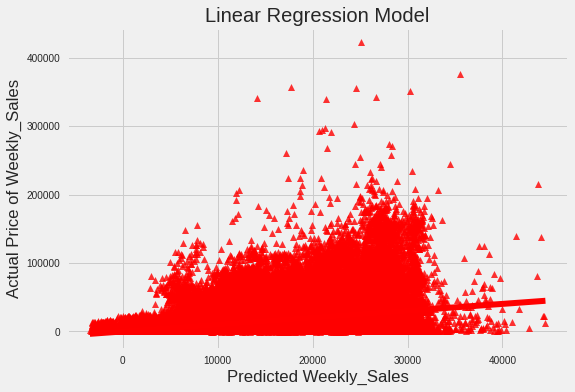

In [111]:
y_predict_linear = linear_regmodel.predict(X_test)

fig = sns.regplot(y_predict_linear, y_test, color = 'red', marker = "^")
fig.set(title = "Linear Regression Model", xlabel = "Predicted Weekly_Sales", ylabel = "Actual Price of Weekly_Sales")

In [112]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 21710.991 
MSE = 471367117.86385465 
MAE = 14581.874190843462 
R2 = 0.08831467380915592


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of Weekly_Sales'),
 Text(0.5, 0, 'Predicted Weekly_Sales'),
 Text(0.5, 1.0, 'Random Forest Regression Model')]

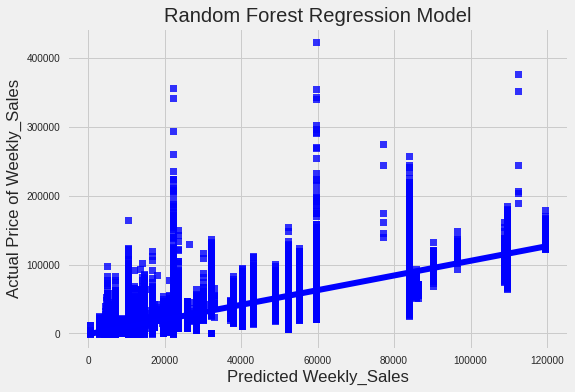

In [120]:
y_predict_RandomForest = rf_model.predict(X_test)

fig = sns.regplot(y_predict_RandomForest, y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Weekly_Sales", ylabel = "Actual Price of Weekly_Sales")

In [114]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 14007.81 
MSE = 196218733.65995303 
MAE = 8740.970518321446 
R2 = 0.6204874429675481


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of Weekly_Sales'),
 Text(0.5, 0, 'Predicted Weekly_Sales'),
 Text(0.5, 1.0, 'XGBoost Model')]

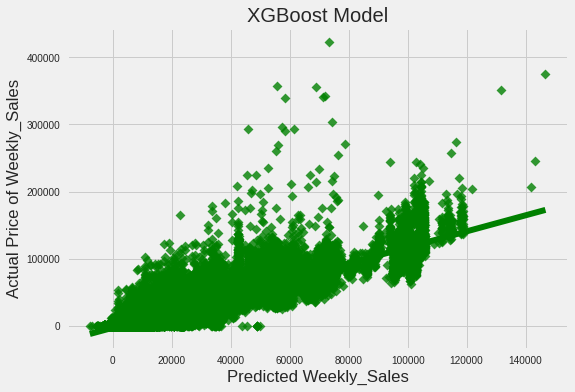

In [119]:
y_predict_XGBoost = xgb_model.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Weekly_Sales", ylabel = "Actual Price of Weekly_Sales")

In [116]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 11467.635 
MSE = 131506641.41598356 
MAE = 6903.0491659891 
R2 = 0.7456490477763406


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of Weekly_Sales'),
 Text(0.5, 0, 'Predicted Weekly_Sales'),
 Text(0.5, 1.0, 'XGBoost Model 2')]

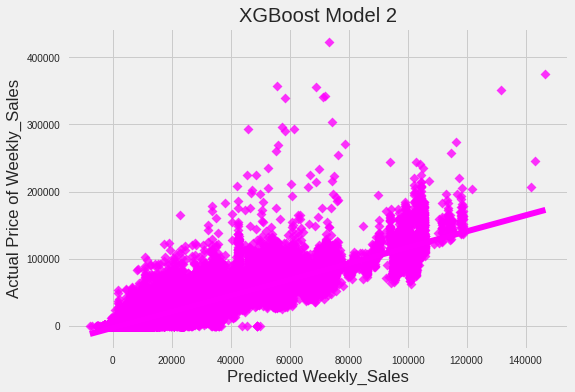

In [131]:
y_predict_XGBoost2 = XGB.predict(X_test)

fig = sns.regplot(y_predict_XGBoost, y_test, color = 'Magenta', marker = "D")
fig.set(title = "XGBoost Model 2", xlabel = "Predicted Weekly_Sales", ylabel = "Actual Price of Weekly_Sales")

In [132]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost2)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost2)
MAE = mean_absolute_error(y_test, y_predict_XGBoost2)
r2 = r2_score(y_test, y_predict_XGBoost2)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 8031.719 
MSE = 64508516.81253999 
MAE = 4695.448956038657 
R2 = 0.8752321365587605


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



[Text(0, 0.5, 'Actual Price of Weekly_Sales'),
 Text(0.5, 0, 'Predicted Weekly_Sales'),
 Text(0.5, 1.0, 'XGBoost Model')]

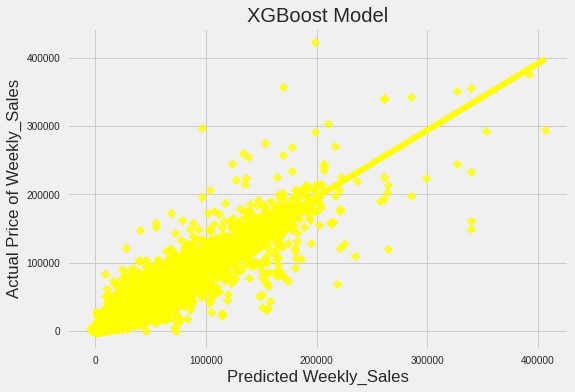

In [125]:
y_predict_dtree = d_model.predict(X_test)

fig = sns.regplot(y_predict_dtree, y_test, color = 'yellow', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Weekly_Sales", ylabel = "Actual Price of Weekly_Sales")

In [124]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_dtree)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_dtree)
MAE = mean_absolute_error(y_test, y_predict_dtree)
r2 = r2_score(y_test, y_predict_dtree)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 4708.233 
MSE = 22167454.507742178 
MAE = 1827.428403902871 
R2 = 0.9571252592134591


Now we are going to predict test data using XGB model 2

In [139]:
X_test_data

array([[1, 1, 44, ..., 0, 1, 151315],
       [1, 1, 45, ..., 0, 1, 151315],
       [1, 1, 46, ..., 0, 1, 151315],
       ...,
       [45, 98, 28, ..., 0, 2, 118221],
       [45, 98, 29, ..., 0, 2, 118221],
       [45, 98, 30, ..., 0, 2, 118221]], dtype=object)

In [140]:
XGB.predict(X_test_data)

array([24033.367 , 23706.053 , 24845.842 , ...,  2392.0242,  2565.831 ,
        2308.8516], dtype=float32)

In [151]:
test_with_feat.shape

(115064, 20)

In [144]:
test_data_predict=XGB.predict(X_test_data)

In [145]:
len(test_data_predict)

115064

In [149]:
test_predicted=pd.DataFrame(test_data_predict,columns=["Weekly_sales_predicted"])

In [154]:
test_predicted

,Weekly_sales_predicted
0,24033.367188
1,23706.052734
2,24845.841797
3,24682.837891
4,28417.681641
...,...
115059,1665.826294
115060,2735.563232
115061,2392.024170
115062,2565.831055
